In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv("DSC_Task.csv")
df.head(10)

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.00000,1
1,405231,51100441,2,2,0.000000,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.50000,2
2,57867,6887426,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.00000,1
3,272618,50742404,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.00000,1
4,251123,45589200,2,2,0.000000,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.00000,1
5,229892,41104551,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.072581,0.0,0.080645,0.000000,0.000000,0.000000,0.000000,0.161290,0.00000,1
6,18167,32824244,1,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.078740,0.0,0.000000,0.015748,0.070866,0.000000,0.007874,0.000000,128.20000,1
7,18705,33815341,1,2,0.000000,0.0,0.0,0,0.0,0.0,...,0.047244,0.0,0.031496,0.000000,0.000000,0.062992,0.000000,0.000000,184.78125,3
8,498266,7900978,2,1,0.013245,0.0,0.0,0,0.0,0.0,...,1.096026,0.0,0.000000,0.215232,0.195364,0.149007,0.125828,0.605960,155.56250,4
9,310459,58074903,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.067961,0.0,0.009709,0.009709,0.000000,0.038835,0.009709,0.019417,0.00000,1


In [4]:
df.shape

(488877, 27)

In [5]:
categorical_cols = ['tier', 'gender']

target = 'age_group'

cont_numerical_cols = ['following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2']

In [6]:
df.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [7]:
df.loc[:,categorical_cols+[target]] = df.loc[:,categorical_cols+[target]].astype('category')

In [8]:
pd.crosstab(df.tier, df.age_group)

age_group,1,2,3,4
tier,,,,
1,21834,9910,10118,9649
2,264458,42935,44501,45996
3,22023,6510,5785,5158


In [9]:
pd.crosstab(df.gender, df.age_group)    

age_group,1,2,3,4
gender,,,,
1,238080,47643,51007,47998
2,70235,11712,9397,12805


In [10]:
df[target].value_counts(sort=False)

1    308315
2     59355
3     60404
4     60803
Name: age_group, dtype: int64

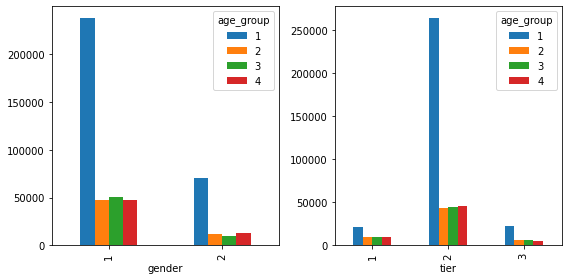

In [11]:
fig, axs = plt.subplots(1,2, figsize= (8,4))
pd.crosstab(df.gender, df.age_group).plot(kind='bar', ax=axs[0])  
pd.crosstab(df.tier, df.age_group).plot(kind='bar', ax=axs[1])  
plt.tight_layout()

<AxesSubplot:>

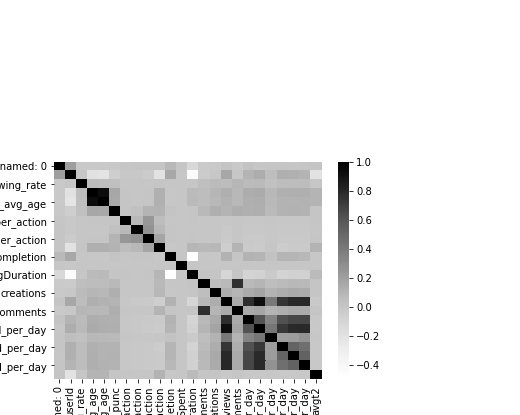

In [12]:
correlation=df.corr()
correlation
sns.heatmap(correlation, cmap="Greys")

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
X

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,265153,48958844,2,1,0.000000,0.000,0.00,0,0.0,0.0,...,0.000000,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000
1,405231,51100441,2,2,0.000000,0.000,0.00,0,0.0,0.0,...,0.008475,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000
2,57867,6887426,2,1,0.000000,0.000,0.00,0,0.0,0.0,...,0.000000,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000
3,272618,50742404,2,1,0.000000,0.000,0.00,0,0.0,0.0,...,0.000000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000
4,251123,45589200,2,2,0.000000,0.000,0.00,0,0.0,0.0,...,0.000000,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,535266,38983571,2,2,0.000000,0.000,0.00,0,0.0,0.0,...,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000
488873,36706,53264639,1,1,0.017241,0.000,0.00,0,0.0,0.0,...,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857
488874,31570,44693578,1,1,0.229508,1.625,2.25,0,0.0,0.0,...,0.016393,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,184.880000
488875,239209,42760145,2,1,0.000000,0.000,0.00,0,0.0,0.0,...,0.000000,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,0.000000


In [16]:
y

0         1
1         2
2         1
3         1
4         1
         ..
488872    1
488873    4
488874    4
488875    1
488876    1
Name: age_group, Length: 488877, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [18]:
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [19]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)


model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr')

In [20]:
predicted = model.predict(X_test)

In [21]:
prediction1= pd.DataFrame(predicted)
prediction1.rename(columns = {0:'prediction'})

,prediction
0,1
1,1
2,1
3,1
4,1
...,...
146659,1
146660,2
146661,1
146662,1


In [22]:
print(metrics.accuracy_score(y_test, predicted))

0.626227295041728


<AxesSubplot:>

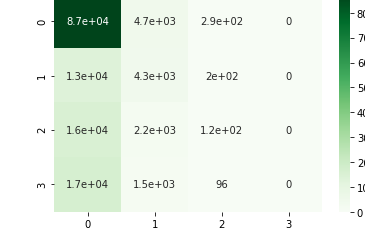

In [23]:
conf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True,cmap='Greens')

In [24]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78     92452
           2       0.34      0.24      0.28     17877
           3       0.17      0.01      0.01     18051
           4       0.00      0.00      0.00     18284

    accuracy                           0.63    146664
   macro avg       0.29      0.30      0.27    146664
weighted avg       0.48      0.63      0.52    146664



In [25]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(multi_class='ovr'), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.63551383, 0.62520455, 0.62767959, 0.62747505, 0.62657503,
        0.62857961, 0.62680003, 0.62562644, 0.6269765 , 0.6246855 ]),
 0.6275116128465894)